Use the following dataset to analyze ups and downs in the market and predict future stock
price returns based on Indian Market data from 2000 to 2020.
Dataset Link: https://www.kaggle.com/datasets/sagara9595/stock-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('HCC.NS.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.70461,1.70461,1.61713,1.67993,0.000051,124838.0
1,2000-01-04,1.61938,1.64405,1.55882,1.57676,0.000048,298720.0
2,2000-01-05,1.59022,1.59246,1.48032,1.50499,0.000046,153819.0
3,2000-01-06,1.54760,1.62610,1.50499,1.62610,0.000050,130411.0
4,2000-01-07,1.70012,1.72031,1.62610,1.67096,0.000051,180570.0
...,...,...,...,...,...,...,...
5006,2020-06-01,4.50000,4.65000,4.50000,4.65000,4.650000,2792909.0
5007,2020-06-02,4.70000,4.85000,4.65000,4.85000,4.850000,3564553.0
5008,2020-06-03,4.95000,5.05000,4.90000,5.05000,5.050000,2741292.0
5009,2020-06-04,5.15000,5.25000,4.80000,5.00000,5.000000,3622992.0


In [5]:
data.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [6]:
data = data.fillna(method='ffill')

<ipython-input-6-449dda89d9c2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data = data.sort_values('Date')

In [9]:
data.set_index('Date', inplace=True)

In [10]:
data = data[['Close']]

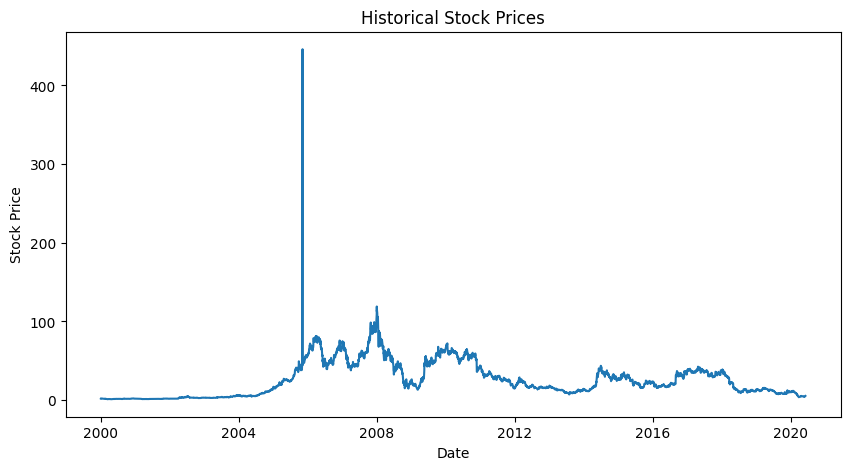

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [12]:
data['Target'] = data['Close'].shift(-1)
X = data[['Close']].dropna()
y = data['Target'].dropna()

In [15]:
data['Target'] = data['Close'].shift(-1)

data.dropna(inplace=True)

X = data[['Close']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
predictions = model.predict(X_test_scaled)

In [19]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 12.76703696702098


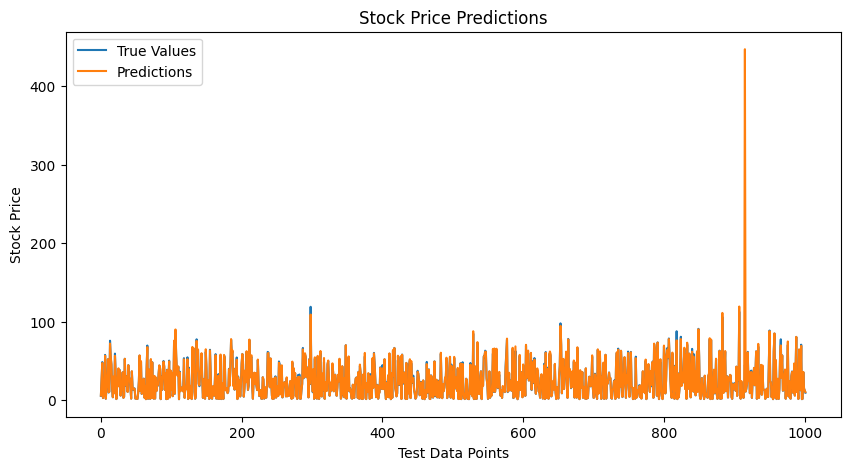

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.show()